<a href="https://colab.research.google.com/github/vindhya1103/GenAI/blob/main/GAI_Exp3_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AIM: Design a CNN architecture to implement the image classification task over an image dataset. Perform the Hyper-parameter tuning and record the results.



## Database
* The data that will be incorporated is the **MNIST database** which contains 60,000 images for training and 10,000 test images.
* The dataset consists of small square 28×28 pixel grayscale images of handwritten single digits between 0 and 9
* The MNIST dataset is conveniently bundled within Keras, and we can easily analyze some of its features in Python.

In [1]:
from tensorflow import keras
from keras.datasets import mnist     # MNIST dataset is included in Keras
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

11490434/11490434 [==============================] - 0s 0us/step
X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)


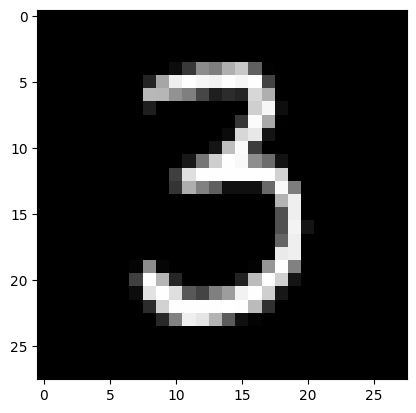

In [2]:
# Visualize any random image
import matplotlib.pyplot as plt
i=50;
plt.imshow(X_train[i], cmap='gray');

### Formatting the Input

In [3]:
# Single-channel input data (grey-scale)
# First apply convolutions then flatten

X_train = X_train.reshape(60000, 28, 28, 1) # single-channel input
X_test = X_test.reshape(10000, 28, 28, 1)

X_train = X_train.astype('float32')         # change integers to 32-bit floating point numbers
X_test = X_test.astype('float32')

X_train /= 255                              # min-max normalization
X_test /= 255

print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)

Training matrix shape (60000, 28, 28, 1)
Testing matrix shape (10000, 28, 28, 1)


# Convolutional Neural Network

* Convolution applies **kernels** (filters) that traverse through each image and generate **feature maps**
* keras Conv2D:  https://keras.io/api/layers/convolution_layers/convolution2d/
* Each kernel in a CNN learns a different characteristic of an image.
* **max pooling** helps in reducing the number of learnable parameters, and decreasing the computational cost (e.g. system memory)

## Building a Convolutional Neural Network

In [4]:
from keras import backend as K
from keras import __version__

print('Using Keras version:', __version__, 'backend:', K.backend())

Using Keras version: 2.15.0 backend: tensorflow


In [5]:
# import cnn layers
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
import tensorflow as tf

In [6]:
model = Sequential()                                 # Linear stacking of layers

# Convolution Layer 1: 8 filters, kernel size 3x3, relu activation, valid padding, stride 1
model.add(Conv2D(8, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1), padding='valid', strides=1))
# MaxPooling: pool size 2, stride 2
model.add(MaxPooling2D(pool_size=(2,2), strides=2))
# Convolution Layer 2: 16 filters, kernel size 3x3, relu activation, valid padding, stride 1
model.add(Conv2D(16, kernel_size=(3,3), activation='relu', padding='valid', strides=1))
# MaxPooling: pool size 2, stride 2
model.add(MaxPooling2D(pool_size=(2,2), strides=2))
# Flatten final feature matrix into a 1d array
model.add(Flatten())
# Fully Connected Layer: 64 units and relu activation
model.add(Dense(64, activation='relu'))
# Dropout layer, 0.2 rate
model.add(Dropout(0.2))
# Final output dense Layer
model.add(Dense(10, activation='softmax'))
#Compile the model with sparse_categorical_crossentropy loss
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 8)         80        
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 8)         0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 16)        1168      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 16)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 400)               0         
                                                                 
 dense (Dense)               (None, 64)                2

In [8]:
# Conv1: 3x3 kernels, one for each the single channel, 8 such filters and 8 biases
print('Conv1: ',3*3*1*8 + 8)
# Conv2: 3x3 kernels, one for each of the 8 channels, 16 such filters and 16 biases
print('Conv2: ',3*3*8*16 + 16)
# input to dense layer
print('Flatten:', 5*5*16)
# 400 inputs, 1 bias connected to each of 64 units in dense layer
print('Dense1: ',400*64+64)
# 64 inputs, 1 bias connected to each of 10 units in output layer
print('Dense2: ',64*10+10)

Conv1:  80
Conv2:  1168
Flatten: 400
Dense1:  25664
Dense2:  650


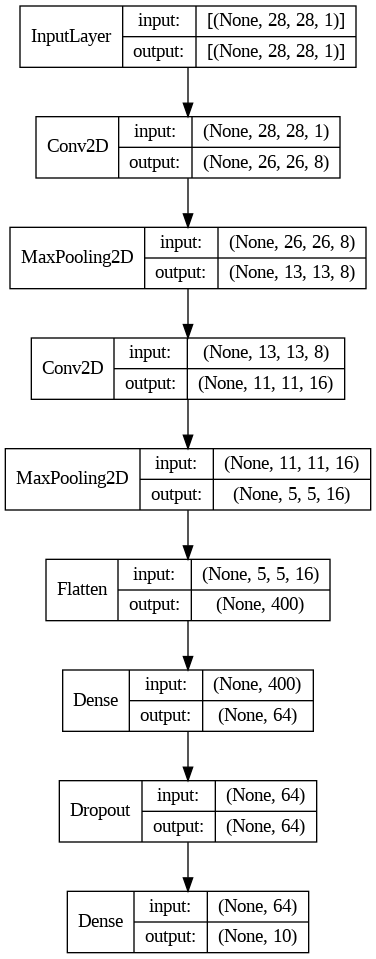

In [10]:
# Visualize the model
from keras.utils import plot_model
plot_model(model, show_shapes=True, show_layer_names=False)

#### Train the model

* Validation data =0.2*60,000 = 12,000
* Batch size = 128
* Number of batches during training are (60000-12000)/128 = 48000/128 = 375




In [11]:
# Train the model
batch_size=128
epochs=10
hist = model.fit(X_train, y_train,epochs=epochs,batch_size=batch_size,verbose=1,validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 20s 45ms/step - loss: 0.4722 - accuracy: 0.8558 - val_loss: 0.1340 - val_accuracy: 0.9617
Epoch 2/10
375/375 [==============================] - 16s 43ms/step - loss: 0.1444 - accuracy: 0.9559 - val_loss: 0.0885 - val_accuracy: 0.9737
Epoch 3/10
375/375 [==============================] - 20s 53ms/step - loss: 0.1088 - accuracy: 0.9675 - val_loss: 0.0793 - val_accuracy: 0.9762
Epoch 4/10
375/375 [==============================] - 17s 44ms/step - loss: 0.0863 - accuracy: 0.9742 - val_loss: 0.0722 - val_accuracy: 0.9787
Epoch 5/10
375/375 [==============================] - 16s 44ms/step - loss: 0.0776 - accuracy: 0.9759 - val_loss: 0.0712 - val_accuracy: 0.9783
Epoch 6/10
375/375 [==============================] - 17s 44ms/step - loss: 0.0666 - accuracy: 0.9795 - val_loss: 0.0634 - val_accuracy: 0.9826
Epoch 7/10
375/375 [==============================] - 20s 54ms/step - loss: 0.0609 - accuracy: 0.9809 - val_loss: 0.0552 - val_accuracy:

### Evaluate Model

In [12]:
score = model.evaluate(X_test, y_test, verbose = 0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.03968589007854462
Test accuracy: 0.9872999787330627


In [13]:
# make one prediction
print('Actual class:',y_test[0])
print('Class Probabilities:')
model.predict(X_test[0].reshape(1,28,28,1))

Actual class: 7
Class Probabilities:
1/1 [==============================] - 0s 241ms/step


array([[8.6553715e-09, 4.4724613e-11, 1.0148500e-07, 1.7779699e-08,
        2.4631473e-12, 6.5023000e-09, 1.9259528e-15, 9.9999869e-01,
        1.4896267e-08, 1.2204297e-06]], dtype=float32)

In [14]:
import numpy as np
yhat_test = np.argmax(model.predict(X_test),axis=-1);
print(yhat_test[0:10]);
print(y_test[0:10]);

313/313 [==============================] - 3s 11ms/step
[7 2 1 0 4 1 4 9 5 9]
[7 2 1 0 4 1 4 9 5 9]


In [15]:
from sklearn.metrics import accuracy_score
print('Accuracy:')
print(float(accuracy_score(y_test, yhat_test))*100,'%')

Accuracy:
98.72999999999999 %


In [16]:
from sklearn.metrics import confusion_matrix
print('Confusion Matrix:')
print(confusion_matrix(y_test, yhat_test))

Confusion Matrix:
[[ 977    0    0    0    0    0    1    1    1    0]
 [   0 1130    2    0    0    0    1    1    1    0]
 [   4    3 1017    1    1    0    0    3    3    0]
 [   0    0    3  993    0    6    0    2    2    4]
 [   0    0    0    0  977    0    1    0    0    4]
 [   4    0    0    2    0  882    2    1    1    0]
 [   4    2    1    0    2    4  945    0    0    0]
 [   0    4    5    1    0    1    0 1012    1    4]
 [   4    0    1    2    5    0    0    2  957    3]
 [   1    5    0    2    9    4    0    3    2  983]]


### Plot Learning curves

In [17]:
hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

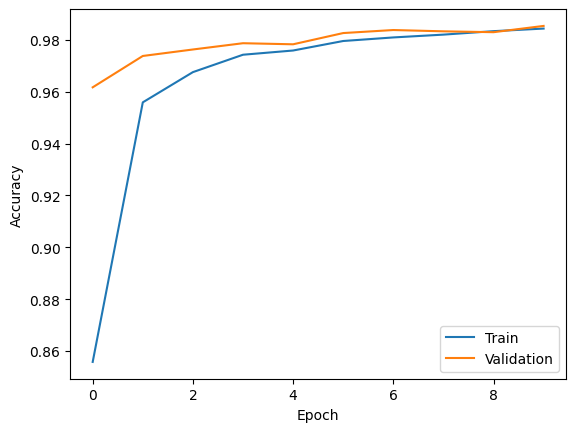

In [18]:
# Plot Accuracy vs epochs (DIY)
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])
plt.show()

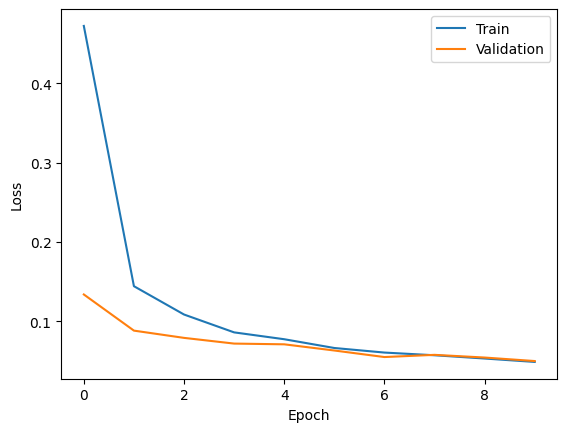

In [19]:
# Plot Loss vs epochs (DIY)
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])
plt.show()